<a href="https://colab.research.google.com/github/Erika2397/Pandas_IO/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Pandas: Formatos diferentes de formas e saídas (IO)**

# Criando os nomes

In [ ]:
# Importando a biblioteca pandas
import pandas as pd

In [ ]:
# Lendo arquivos json através do IBGE
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [ ]:
print("A quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

A quantidade de nomes: 400


In [ ]:
# Criando a variavel frames para depois concatenar dois dataframe
frames = [nomes_f, nomes_m]

In [ ]:
# Concatenando os frames através do pd.concat e depois transformando em um só dataframe
nomes = pd.concat(frames)['nome'].to_frame()

In [ ]:
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [ ]:
# Olhando 5 alunes de maneira random com .sample
nomes.sample(5)

,nome
52,SAMUEL
81,LUAN
141,ORLANDO
22,VITORIA
172,WANDERSON


# Incluindo ID dos alunos

In [ ]:
# Importando a biblioteca numpy e executando uo np.random.seed 
import numpy as np
np.random.seed(123)

In [ ]:
# Vendo o total de alunos
total_alunos = len(nomes)
total_alunos

400

In [ ]:
# Adicionando a coluna do 'id_aluno' dentro do nosso df nomes / Usando np.random.permutation
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [ ]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [ ]:
# Criando os dominios de e-mail para cada estudante
dominios = ['@dominiodoemail.com.br', 'servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominiodoemail.com.br
0,JOSE,331,servicodoemail.com
179,IAGO,340,@dominiodoemail.com.br
10,SANDRA,174,@dominiodoemail.com.br
171,TERESINHA,45,@dominiodoemail.com.br


In [ ]:
# Criando a coluna e-mail, concatenando str com nomes e dominio
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
# Verificando se deu tudo certo
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominiodoemail.com.br,arthur@dominiodoemail.com.br
57,DAIANE,303,servicodoemail.com,daianeservicodoemail.com
85,HELENA,221,@dominiodoemail.com.br,helena@dominiodoemail.com.br
183,IRACI,8,@dominiodoemail.com.br,iraci@dominiodoemail.com.br
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br


# Criando a tabela Cursos

In [ ]:
# Instalando html5lib e lxml
!pip3 install html5lib
!pip3 install lxml

In [ ]:
# Importando html5lib
import html5lib

In [ ]:
# Lendo os dados da tabela dentro de uma página html
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
# Verificando o tipo da nossa variavel curso
type(cursos)

list

In [ ]:
# Olhando agora como um DataFrame
cursos = cursos[0]

In [ ]:
# Verificando novamente o tipo 
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
# Mostrando os 5 primeiros
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [ ]:
# Renomeando o nome da coluna, usando .rename
cursos = cursos.rename(columns={'Nome do curso':'nome_do_curso'})
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [ ]:
# Criando uma coluna id e adicionando index começando a partir do número 1
cursos['id'] = cursos.index + 1

In [ ]:
# Verificando os 5 primeiros
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
# Colocando o id como nosso index do df de cursos
cursos = cursos.set_index('id')

In [ ]:
# Verificnado os 5 primeiros do nosso df de cursos
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
# Olhando os 5 primeiros de maneira random do nosso df de nomes
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominiodoemail.com.br,isabel@dominiodoemail.com.br
172,REBECA,165,servicodoemail.com,rebecaservicodoemail.com
130,JUNIOR,184,@dominiodoemail.com.br,junior@dominiodoemail.com.br
70,JOAQUIM,248,servicodoemail.com,joaquimservicodoemail.com
171,VALDEMIR,3,@dominiodoemail.com.br,valdemir@dominiodoemail.com.br


# Matriculando os alunos nos cursos

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
189,DALVA,137,@dominiodoemail.com.br,dalva@dominiodoemail.com.br
144,VINICIOS,147,servicodoemail.com,viniciosservicodoemail.com
69,TEREZA,151,servicodoemail.com,terezaservicodoemail.com
105,PABLO,141,@dominiodoemail.com.br,pablo@dominiodoemail.com.br
109,CELSO,266,servicodoemail.com,celsoservicodoemail.com


In [ ]:
# Criando a coluna de matriculas
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
15,LETICIA,347,@dominiodoemail.com.br,leticia@dominiodoemail.com.br,2
157,JAIME,214,servicodoemail.com,jaimeservicodoemail.com,1
36,ROBERTO,364,@dominiodoemail.com.br,roberto@dominiodoemail.com.br,2
91,CELIA,367,@dominiodoemail.com.br,celia@dominiodoemail.com.br,2
183,MARLON,74,servicodoemail.com,marlonservicodoemail.com,1


In [ ]:
# Vendo as estatisticas na parte de matriculas
nomes.matriculas.describe()

count    400.000000
mean       2.110000
std        1.560123
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [ ]:
# Importando biblioteca seaborn
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


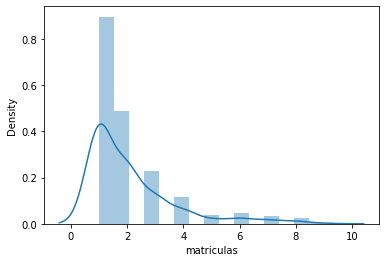

In [ ]:
# Plotando o gráfico
sns.distplot(nomes.matriculas)

In [ ]:
# Contando quantos alunos são inscritos por matriculas
nomes.matriculas.value_counts()

1    191
2    104
3     49
4     25
6     10
5      8
7      7
8      5
9      1
Name: matriculas, dtype: int64

# Selecionando Cursos

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominiodoemail.com.br,cristiane@dominiodoemail.com.br,1
154,NICOLE,182,@dominiodoemail.com.br,nicole@dominiodoemail.com.br,7
191,TERESA,264,@dominiodoemail.com.br,teresa@dominiodoemail.com.br,3


In [ ]:
# Criando a variavel todas_matriculas / Usando probabilidade
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
# Usando os laços de for / criando um dataframe especificando as colunas que eu quero mostrar
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head(5)

,id_aluno,id_curso
0,235,19
1,235,19
2,235,9
3,43,1
4,304,19


In [ ]:
# Agrupando por id_curso, e juntando com o dataframe de cursos
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso'])

,id_aluno,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,50,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,58,Cursos de Python
6,16,PHP com MySql
7,55,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [ ]:
# Renomeando id_aluno por quantidade_de_aluno
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,50,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,58,Cursos de Python
6,16,PHP com MySql
7,55,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [ ]:
# Atribuindo as instruções na nossa variavel de matriculas_por_curso
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,50,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,58,Cursos de Python
6,16,PHP com MySql
7,55,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


# Saída em diferentes formatos

In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,50,Java para Web
3,25,C# para Web


In [ ]:
# Exportando para csv
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index= False)

In [ ]:
# Lendo arquivo csv
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,62,Lógica de programação
1,50,Java para Web
2,25,C# para Web
3,33,Ruby on Rails
4,58,Cursos de Python
5,16,PHP com MySql
6,55,.NET para web
7,37,Novas integrações com Java
8,70,TDD com Java
9,11,Código limpo com C#


In [ ]:
# Exportando para json
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":62,"2":50,"3":25,"4":33,"5":58,"6":16,"7":55,"8":37,"9":70,"10":11,"11":81,"12":21,"13":51,"14":31,"15":78,"16":16,"17":44,"18":23,"19":64,"20":18},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

# Criando o banco SQL

In [ ]:
!pip3 install sqlalchemy

In [ ]:
from sqlalchemy import create_engine, MetaData, Table

In [ ]:
engine = create_engine('sqlite:///:memory:')

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
print(engine.table_names())

['matriculas']


# Buscando do Banco SQL

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,6,16,PHP com MySql
1,10,11,Código limpo com C#
2,16,16,Estatística básica
3,20,18,Orientação objetos com Java


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 60')
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,62
8,TDD com Java,70
10,Preparatório para certificação Java,81
14,Análise de dados,78
18,Boas práticas em Java,64


#Escrevendo no Banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


# Nomes dos alunos e alunas da próxima turma

In [ ]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,62,Lógica de programação
2,50,Java para Web
3,25,C# para Web
4,33,Ruby on Rails
5,58,Cursos de Python
6,16,PHP com MySql
7,55,.NET para web
8,37,Novas integrações com Java
9,70,TDD com Java


In [ ]:
matriculas

,id_aluno,id_curso
0,235,19
1,235,19
2,235,9
3,43,1
4,304,19
...,...,...
839,383,9
840,383,7
841,383,1
842,383,15


In [ ]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
95,358,16
155,180,16
176,126,16
178,221,16
334,105,16
354,375,16
416,11,16
424,390,16
720,159,16
742,332,16


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
358,16,FABIANA,servicodoemail.com,fabianaservicodoemail.com,1
180,16,MARLI,@dominiodoemail.com.br,marli@dominiodoemail.com.br,2
126,16,FATIMA,servicodoemail.com,fatimaservicodoemail.com,2
221,16,HELENA,@dominiodoemail.com.br,helena@dominiodoemail.com.br,3
105,16,MARISA,servicodoemail.com,marisaservicodoemail.com,4
375,16,MARA,servicodoemail.com,maraservicodoemail.com,3
11,16,PAULO,servicodoemail.com,pauloservicodoemail.com,2
390,16,MARCOS,servicodoemail.com,marcosservicodoemail.com,3
159,16,ORLANDO,servicodoemail.com,orlandoservicodoemail.com,1


In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
proxima_turma

,nome
id_aluno,
358,FABIANA
180,MARLI
126,FATIMA
221,HELENA
105,MARISA
375,MARA
11,PAULO
390,MARCOS
159,ORLANDO


In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome':'Alunos do curso de {}'.format(nome_curso)})

In [ ]:
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
358,FABIANA
180,MARLI
126,FATIMA
221,HELENA
105,MARISA
375,MARA
11,PAULO
390,MARCOS
159,ORLANDO


# Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,FABIANA
1,MARLI
2,FATIMA
3,HELENA
4,MARISA
5,MARA
6,PAULO
7,MARCOS
8,ORLANDO
9,APARECIDO
